In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\ashis\Downloads\archive (6)\Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape

(400, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [8]:
x = df.drop('Chance of Admit ', axis =1 )
y = df['Chance of Admit ']


In [9]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [10]:
y = y.astype('int')
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

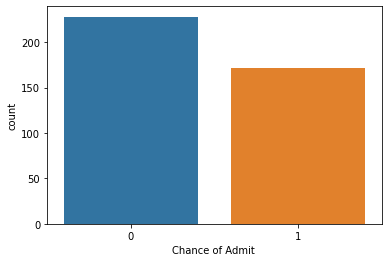

In [19]:
sns.countplot(x = y);


In [20]:
 y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

### cross-validation


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [22]:
x_train.shape

(300, 8)

In [23]:
x_test.shape

(100, 8)

In [24]:
# to build the class 
from sklearn.tree import DecisionTreeClassifier

In [25]:
classifier = DecisionTreeClassifier(random_state=0)

In [26]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
result = pd.DataFrame({
    "actual": y_test,
    "predicted":y_pred
})
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

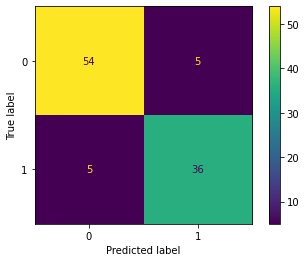

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [31]:
accuracy_score(y_test,y_pred)

0.9

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [33]:
new = [[1,337,118,4,4.5,4.5,9.65,1]]
classifier.predict(new)[0]

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

[Text(0.565625, 0.95, 'X[6] <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]'),
 Text(0.365625, 0.85, 'X[5] <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]'),
 Text(0.25625, 0.75, 'X[1] <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]'),
 Text(0.1625, 0.65, 'X[4] <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]'),
 Text(0.1, 0.55, 'X[6] <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]'),
 Text(0.05, 0.45, 'X[4] <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.075, 0.35, 'X[1] <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.1, 0.25, 'X[1] <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.075, 0.15, 'X[6] <= 8.355\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),


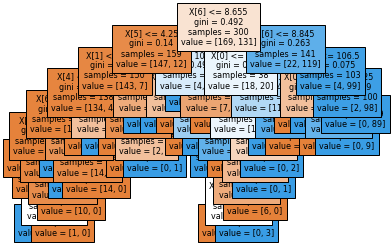

In [35]:
from sklearn.tree import plot_tree
plot_tree(classifier,filled=True,fontsize=8)